<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [2]:
hockey = pd.read_csv('data/NHL_Data_GA.csv')

In [3]:
hockey.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 2. Perform any required data cleaning. Do some EDA.

In [4]:
hockey.shape

(90, 28)

In [5]:
hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
Team    90 non-null object
PTS     90 non-null int64
Rank    90 non-null int64
TOI     90 non-null object
GF      90 non-null int64
GA      90 non-null int64
GF60    90 non-null float64
GA60    90 non-null float64
GF%     90 non-null float64
SF      90 non-null int64
SA      90 non-null int64
SF60    90 non-null float64
SA60    90 non-null float64
SF%     90 non-null float64
FF      90 non-null int64
FA      90 non-null int64
FF60    90 non-null float64
FA60    90 non-null float64
FF%     90 non-null float64
CF      90 non-null int64
CA      90 non-null int64
CF60    90 non-null float64
CA60    90 non-null float64
CF%     90 non-null float64
Sh%     90 non-null float64
Sv%     90 non-null float64
PDO     90 non-null int64
PIM     90 non-null int64
dtypes: float64(14), int64(12), object(2)
memory usage: 19.8+ KB


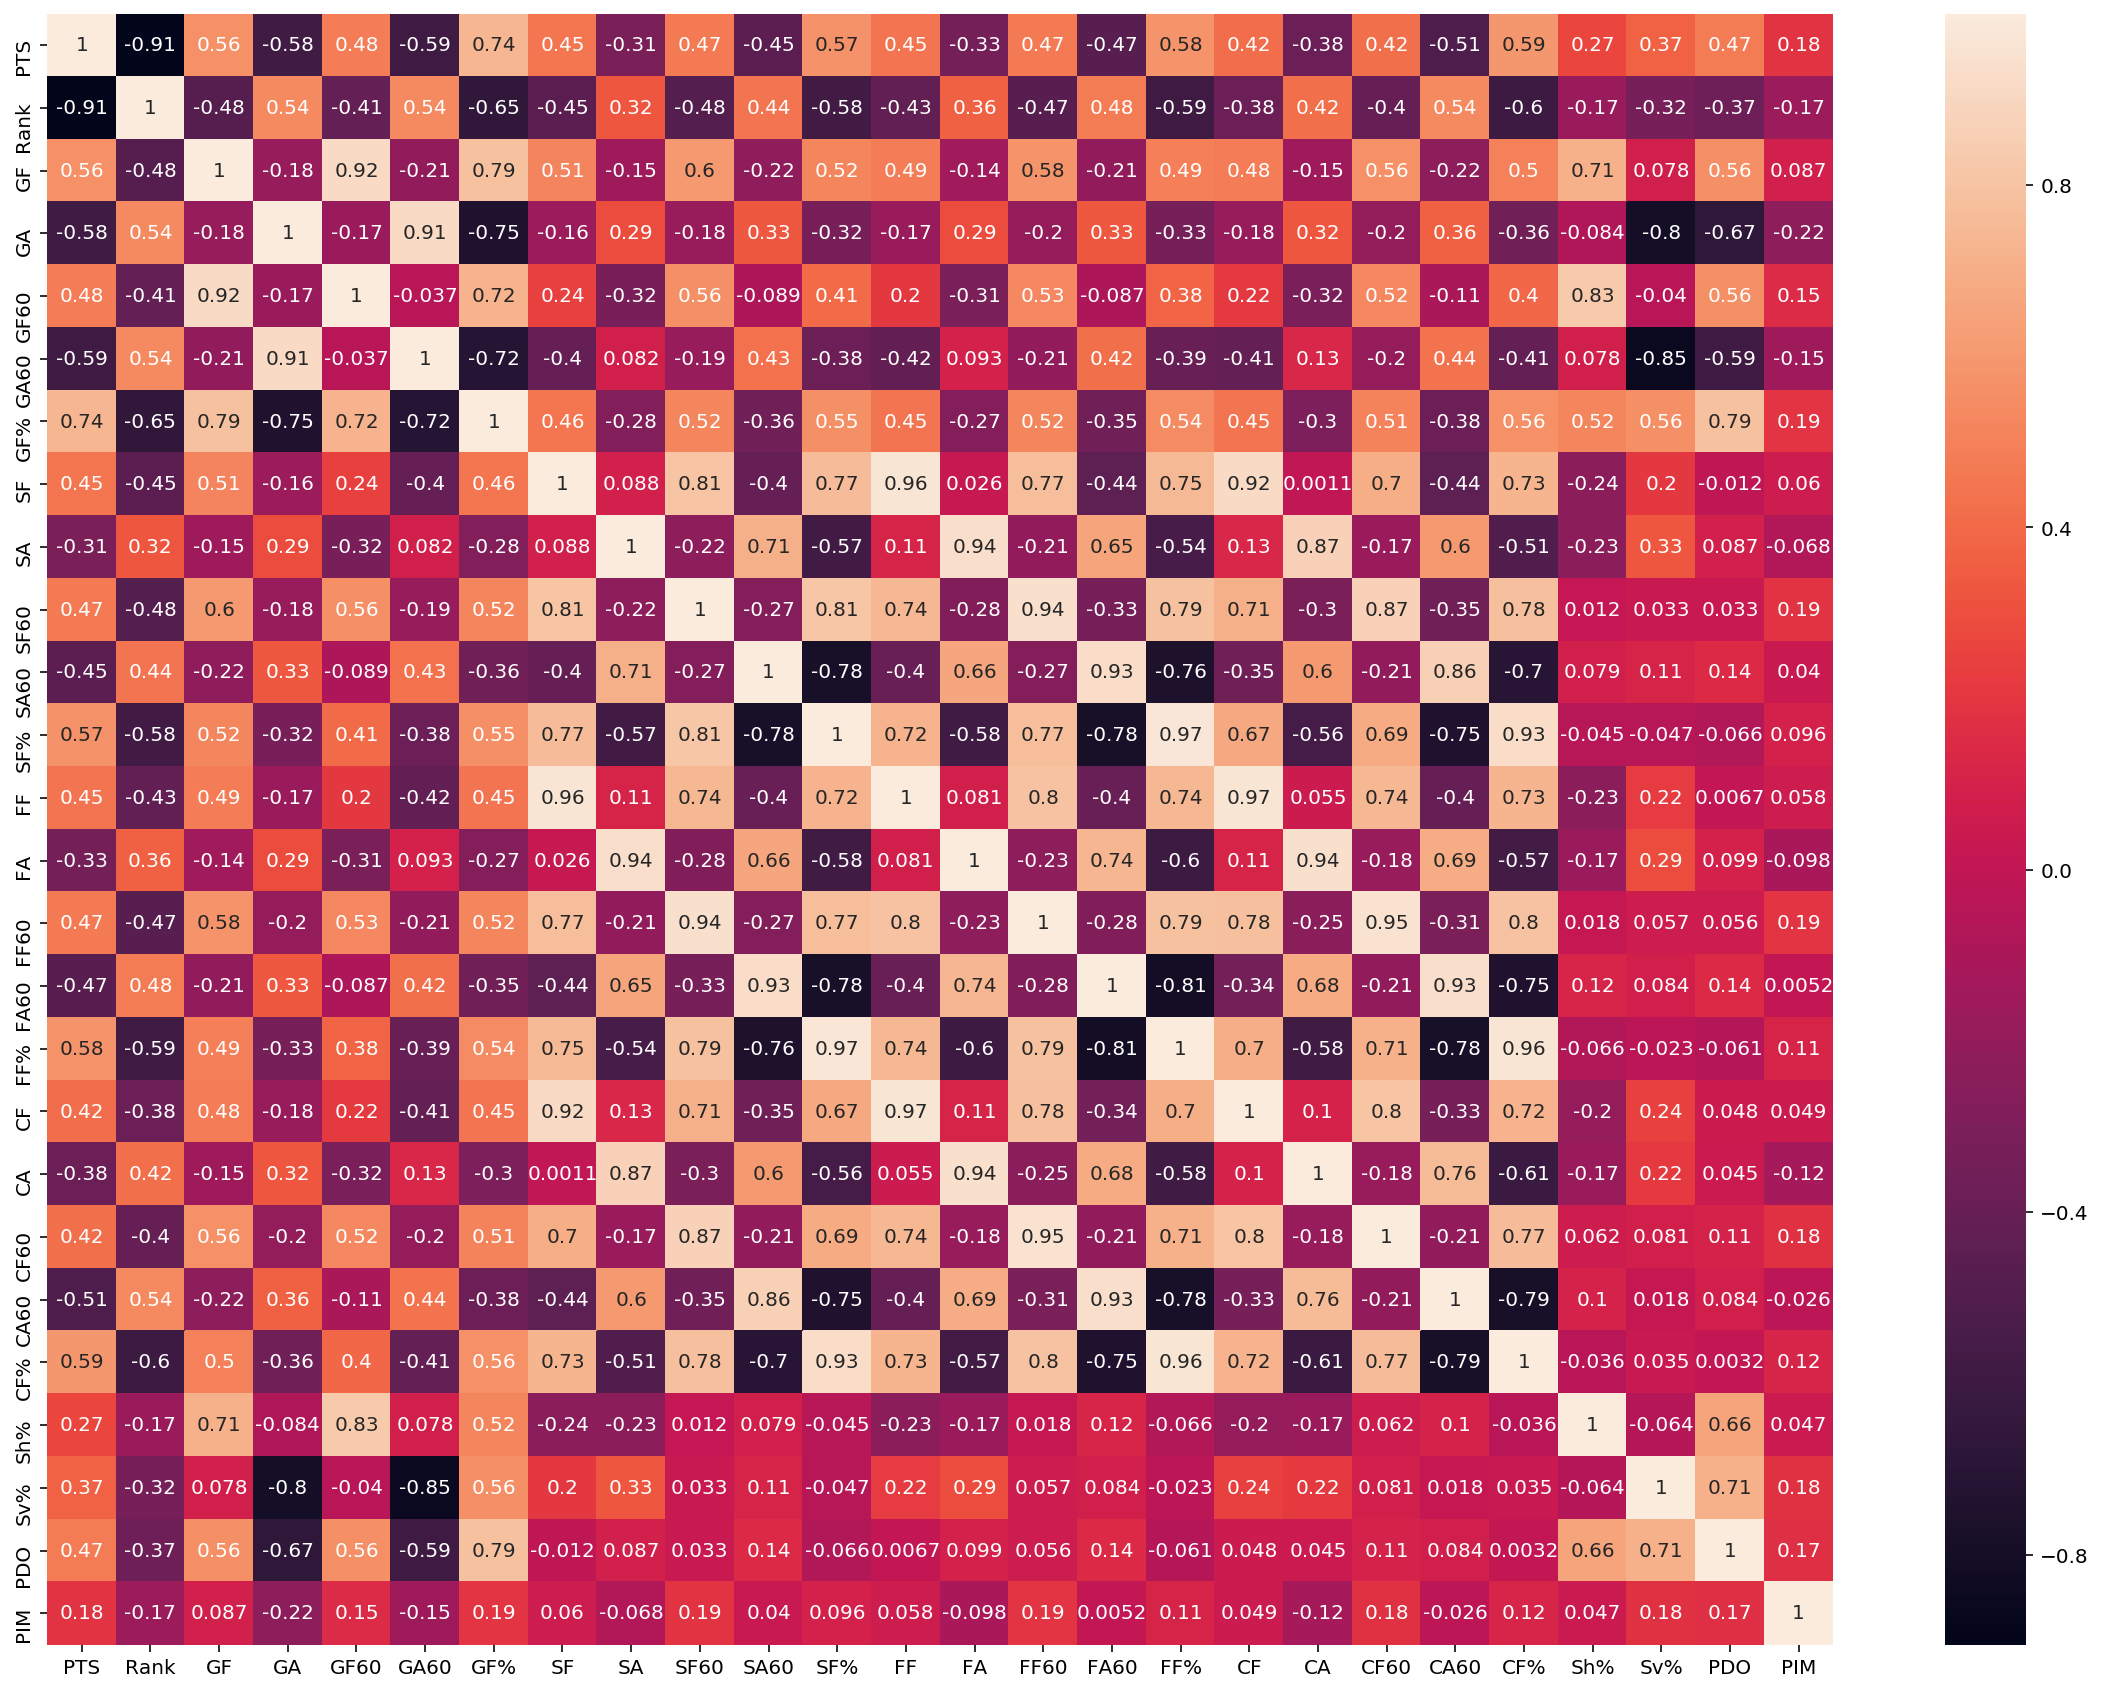

In [8]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,15))
corr = hockey.corr()
sns.heatmap(corr, annot=True)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [11]:
hockey.columns

Index(['Team', 'PTS', 'Rank', 'TOI', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM'],
      dtype='object')

In [76]:
X = hockey[['PTS', 'GF', 'GA', 'GF60', 'GA60', 'GF%', 'SF',
       'SA', 'SF60', 'SA60', 'SF%', 'FF', 'FA', 'FF60', 'FA60', 'FF%', 'CF',
       'CA', 'CF60', 'CA60', 'CF%', 'Sh%', 'Sv%', 'PDO', 'PIM']]
y = hockey['Rank']

In [77]:
X.dtypes

PTS       int64
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [78]:
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

In [79]:
y.unique()

array([1, 2, 3], dtype=int64)

### 4. What is the baseline accuracy?

In [82]:
most_freq_class = y.value_counts().index[0]
y.value_counts()[most_freq_class] / len(y)

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [83]:
X_preds = hockey[[ 'PTS', 'GA60', 'FF60', 'PIM']]

In [84]:
hockey[[ 'PTS', 'GA60', 'FF60', 'PIM']].head()

,PTS,GA60,FF60,PIM
0,121,2.19,45.7,1269
1,117,2.10,46.7,985
2,113,2.11,46.4,1195
3,112,2.46,47.5,966
4,111,2.16,44.0,1049


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)


In [87]:
knn.fit(X_preds, y_preds)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [88]:
y_preds = knn.predict(X_preds)

In [89]:
knn.score(X_preds,y_preds)

1.0

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: Yes but not legitimate

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 50)

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [91]:
X_train.shape

(50, 25)

In [92]:
y_train.shape

(50,)

In [94]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

knn.score(X_train, y_train)

0.4

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [97]:
scores = []
for k in range(1,50): #run through k=1 through k=50
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    X_train_pred = knn.predict(X_train)
    score = float(sum(X_train_pred == y_train)) / len(y_train)
    scores.append([k, score])

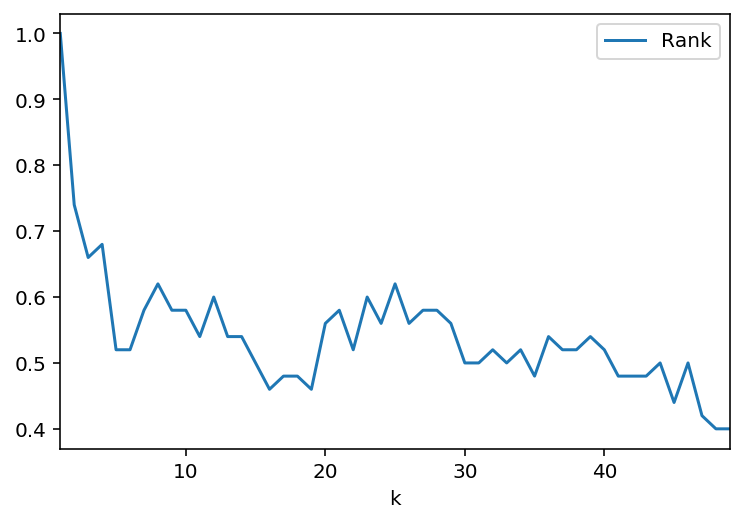

In [100]:
%matplotlib inline
data = pd.DataFrame(scores,columns=['k','Rank'])
data.plot.line(x='k',y='Rank');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [147]:
a = hockey[['PTS','CF%']]
b = hockey.Rank

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
a_train, a_test, b_train, b_test = train_test_split(a,b)

In [150]:
from sklearn.dummy import DummyClassifier

In [151]:
dum = DummyClassifier(strategy = 'most_frequent')

In [152]:
a_train.shape

(67, 2)

In [153]:
b_train.shape

(67,)

In [154]:
dum.fit(a_train, b_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [155]:
preds = dum.predict(a_test)

In [188]:
dum.score(a_test, b_test)

0.2608695652173913

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [171]:
pipe = Pipeline([('sscaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [189]:
pipe.fit(a_train, b_train)

Pipeline(memory=None,
         steps=[('sscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [190]:
preds = pipe.predict(a_test)

In [191]:
pipe.score(a_test, b_test)

0.8260869565217391

In [192]:
params = {'knn__n_neighbors': [i for i in range(1, 30)]}

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
grid = GridSearchCV(pipe, param_grid=params, cv=5)  #cv splits it out into 5 sets

In [185]:
grid.fit(a_train, b_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=Fa

In [186]:
grid.score(a_test, b_test)

0.7391304347826086

In [187]:
grid.best_estimator_
# n_neighbors = 1

Pipeline(memory=None,
         steps=[('sscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)